🚜 ##Predicting the Sale Price of Bulldozers using Machine Learning

In this notebook, we're going to go through an example machine learning project with the goal of predicting the sale price of bulldozers.

Since we're trying to predict a number, this kind of problem is known as a regression problem.

The data and evaluation metric we'll be using (root mean square log error or RMSLE) is from the Kaggle Bluebook for Bulldozers competition.

The techniques used in here have been inspired and adapted from the fast.ai machine learning course.
What we'll end up with

Since we already have a dataset, we'll approach the problem with the following machine learning modelling framework.


6 Step Machine Learning Modelling Framework (read more)

To work through these topics, we'll use pandas, Matplotlib and NumPy for data anaylsis, as well as, Scikit-Learn for machine learning and modelling tasks.



Tools which can be used for each step of the machine learning modelling process.

We'll work through each step and by the end of the notebook, we'll have a trained machine learning model which predicts the sale price of a bulldozer given different characteristics about it.

1. Problem Definition
For this dataset, the problem we're trying to solve, or better, the question we're trying to answer is,
How well can we predict the future sale price of a bulldozer, given its characteristics previous examples of how much similar bulldozers have been sold for?

2. Data
Looking at the dataset from Kaggle, you can you it's a time series problem. This means there's a time attribute to dataset.
In this case, it's historical sales data of bulldozers. Including things like, model type, size, sale date and more.
There are 3 datasets:

Train.csv - Historical bulldozer sales examples up to 2011 (close to 400,000 examples with 50+ different attributes, including SalePrice which is the target variable).

Valid.csv - Historical bulldozer sales examples from January 1 2012 to April 30 2012 (close to 12,000 examples with the same attributes as Train.csv).

Test.csv - Historical bulldozer sales examples from May 1 2012 to November 2012 (close to 12,000 examples but missing the SalePrice attribute, as this is what we'll be trying to predict).

3. Evaluation
For this problem, Kaggle has set the evaluation metric to being root mean squared log error (RMSLE). As with many regression evaluations, the goal will be to get this value as low as possible.
To see how well our model is doing, we'll calculate the RMSLE and then compare our results to others on the Kaggle leaderboard.

4. Features
Features are different parts of the data. During this step, you'll want to start finding out what you can about the data.

One of the most common ways to do this, is to create a data dictionary.
For this dataset, Kaggle provide a data dictionary which contains information about what each attribute of the dataset means. You can download this file directly from the Kaggle competition page (account required) or view it on Google Sheets.

With all of this being known, let's get started!
First, we'll import the dataset and start exploring. Since we know the evaluation metric we're trying to minimise, our first goal will be building a baseline model and seeing how it stacks up against the competition.

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn

In [5]:
## Import training and validation sets

df = pd.read_csv('Data/bluebook-for-bulldozers/TrainAndValid.csv', low_memory=False)

In [6]:
df

,SalesID,SalePrice,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,saledate,...,Undercarriage_Pad_Width,Stick_Length,Thumb,Pattern_Changer,Grouser_Type,Backhoe_Mounting,Blade_Type,Travel_Controls,Differential_Type,Steering_Controls
0,1139246,66000.0,999089,3157,121,3.0,2004,68.0,Low,11/16/2006 0:00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Standard,Conventional
1,1139248,57000.0,117657,77,121,3.0,1996,4640.0,Low,3/26/2004 0:00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Standard,Conventional
2,1139249,10000.0,434808,7009,121,3.0,2001,2838.0,High,2/26/2004 0:00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1139251,38500.0,1026470,332,121,3.0,2001,3486.0,High,5/19/2011 0:00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1139253,11000.0,1057373,17311,121,3.0,2007,722.0,Medium,7/23/2009 0:00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
412693,6333344,10000.0,1919201,21435,149,2.0,2005,NaN,NaN,3/7/2012 0:00,...,None or Unspecified,None or Unspecified,None or Unspecified,None or Unspecified,Double,NaN,NaN,NaN,NaN,NaN
412694,6333345,10500.0,1882122,21436,149,2.0,2005,NaN,NaN,1/28/2012 0:00,...,None or Unspecified,None or Unspecified,None or Unspecified,None or Unspecified,Double,NaN,NaN,NaN,NaN,NaN
412695,6333347,12500.0,1944213,21435,149,2.0,2005,NaN,NaN,1/28/2012 0:00,...,None or Unspecified,None or Unspecified,None or Unspecified,None or Unspecified,Double,NaN,NaN,NaN,NaN,NaN
412696,6333348,10000.0,1794518,21435,149,2.0,2006,NaN,NaN,3/7/2012 0:00,...,None or Unspecified,None or Unspecified,None or Unspecified,None or Unspecified,Double,NaN,NaN,NaN,NaN,NaN


In [7]:
df.isna().sum()

SalesID                          0
SalePrice                        0
MachineID                        0
ModelID                          0
datasource                       0
auctioneerID                 20136
YearMade                         0
MachineHoursCurrentMeter    265194
UsageBand                   339028
saledate                         0
fiModelDesc                      0
fiBaseModel                      0
fiSecondaryDesc             140727
fiModelSeries               354031
fiModelDescriptor           337882
ProductSize                 216605
fiProductClassDesc               0
state                            0
ProductGroup                     0
ProductGroupDesc                 0
Drive_System                305611
Enclosure                      334
Forks                       214983
Pad_Type                    331602
Ride_Control                259970
Stick                       331602
Transmission                224691
Turbocharged                331602
Blade_Extension     

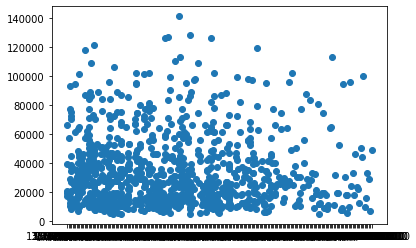

In [8]:
fig, ax = plt.subplots()
ax.scatter(df['saledate'][:1000], df['SalePrice'][:1000])

## Parsing dates

When we work with time series data, we want to enrich time and date component as much as we can.

We can do that by telling pandas wich of our columns has dates in it using the parse_dates parameter.



In [9]:
## Import data again but this time with parse dates

df = pd.read_csv('Data/bluebook-for-bulldozers/TrainAndValid.csv', low_memory=False, parse_dates= ['saledate'])

In [10]:
df.saledate.dtype

dtype('<M8[ns]')

In [11]:
df.saledate[:100]

0    2006-11-16
1    2004-03-26
2    2004-02-26
3    2011-05-19
4    2009-07-23
        ...    
95   2005-12-15
96   2004-01-29
97   2008-09-18
98   2005-11-03
99   2006-06-01
Name: saledate, Length: 100, dtype: datetime64[ns]

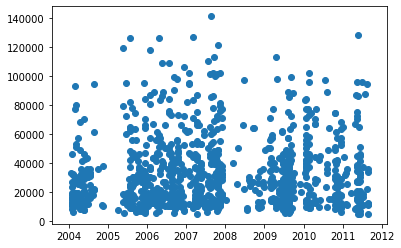

In [12]:
fig, ax = plt.subplots()
ax.scatter(df['saledate'][:1000], df['SalePrice'][:1000])

## Sort data frame by saledate

When working with time series data, it's a good idea to sort it by date.

In [13]:
## Sort DataFrame in date order

df.sort_values(by = ['saledate'],inplace = True, ascending =True)
df.saledate.head(200)

205615   1989-01-17
274835   1989-01-31
141296   1989-01-31
212552   1989-01-31
62755    1989-01-31
            ...    
239451   1989-02-01
167548   1989-02-01
235772   1989-02-01
235744   1989-02-01
52561    1989-02-01
Name: saledate, Length: 200, dtype: datetime64[ns]

## Make a copy of the original datafram

So when we manipulate our copy, we have a orginal in case of a mistake.

In [14]:
## make a copy using copy()
df_temp = df.copy()

In [15]:
df_temp.head()

,SalesID,SalePrice,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,saledate,...,Undercarriage_Pad_Width,Stick_Length,Thumb,Pattern_Changer,Grouser_Type,Backhoe_Mounting,Blade_Type,Travel_Controls,Differential_Type,Steering_Controls
205615,1646770,9500.0,1126363,8434,132,18.0,1974,NaN,NaN,1989-01-17,...,NaN,NaN,NaN,NaN,NaN,None or Unspecified,Straight,None or Unspecified,NaN,NaN
274835,1821514,14000.0,1194089,10150,132,99.0,1980,NaN,NaN,1989-01-31,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Standard,Conventional
141296,1505138,50000.0,1473654,4139,132,99.0,1978,NaN,NaN,1989-01-31,...,NaN,NaN,NaN,NaN,NaN,None or Unspecified,Straight,None or Unspecified,NaN,NaN
212552,1671174,16000.0,1327630,8591,132,99.0,1980,NaN,NaN,1989-01-31,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Standard,Conventional
62755,1329056,22000.0,1336053,4089,132,99.0,1984,NaN,NaN,1989-01-31,...,NaN,NaN,NaN,NaN,NaN,None or Unspecified,PAT,Lever,NaN,NaN


## Add datetime parameters for saledate



In [16]:
df_temp['saleYear'] = df_temp.saledate.dt.year
df_temp['saleMonth'] = df_temp.saledate.dt.month
df_temp['saleDay'] = df_temp.saledate.dt.day
df_temp['saleDayofweek'] = df_temp.saledate.dt.dayofweek
df_temp['saledayofyear'] = df_temp.saledate.dt.dayofyear

df_temp.head().T








,205615,274835,141296,212552,62755
SalesID,1646770,1821514,1505138,1671174,1329056
SalePrice,9500,14000,50000,16000,22000
MachineID,1126363,1194089,1473654,1327630,1336053
ModelID,8434,10150,4139,8591,4089
datasource,132,132,132,132,132
auctioneerID,18,99,99,99,99
YearMade,1974,1980,1978,1980,1984
MachineHoursCurrentMeter,NaN,NaN,NaN,NaN,NaN
UsageBand,NaN,NaN,NaN,NaN,NaN
saledate,1989-01-17 00:00:00,1989-01-31 00:00:00,1989-01-31 00:00:00,1989-01-31 00:00:00,1989-01-31 00:00:00


In [17]:
## Now we enriched our DataFrame with date time features, let's drop saledate column

df_temp.drop('saledate', inplace= True, axis=1)

In [18]:
df_temp.head().T


,205615,274835,141296,212552,62755
SalesID,1646770,1821514,1505138,1671174,1329056
SalePrice,9500,14000,50000,16000,22000
MachineID,1126363,1194089,1473654,1327630,1336053
ModelID,8434,10150,4139,8591,4089
datasource,132,132,132,132,132
auctioneerID,18,99,99,99,99
YearMade,1974,1980,1978,1980,1984
MachineHoursCurrentMeter,NaN,NaN,NaN,NaN,NaN
UsageBand,NaN,NaN,NaN,NaN,NaN
fiModelDesc,TD20,A66,D7G,A62,D3B


## Modelling

We have done enough EDA, let's now do model driven EDA.

## Before we create a ML, we need to take care of null values and convert columsn to numerical.

In [19]:
## Let's build a ML model

from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor(n_jobs=-1, random_state=42) ## same as np.random.seed(42)


model.fit(df_temp.drop('SalePrice', axis =1), df_temp['SalePrice'])



ValueError: could not convert string to float: 'Low'

## This is because all data is not in numeric format. We have to convert it to numerical and get rid of missing datas.

In [ ]:
df_temp['UsageBand'].dtype

In [ ]:
df_temp.info()

## Convert strings to categories. 

One way we can turn all of our data into numbers is by converting them into categories.

## Use Pandas API to see if content is which data type

In [ ]:
pd.api.types.is_string_dtype(df_temp['UsageBand'])

In [ ]:
## We will not create a for loop to check all the columns and print which are string type

for label,content in df_temp.items():
    if pd.api.types.is_string_dtype(content):
        print(label)

In [ ]:
## THis will turn all of the string value into category values

for label,content in df_temp.items():
    if pd.api.types.is_string_dtype(content):
        df_temp[label]=content.astype('category').cat.as_ordered()


In [ ]:
df_temp.info()

In [ ]:
df_temp.state.cat.codes

## THanks to pandas categories, now we have a way to access all the data in form of numbers. 

But we still have a bunch of missing data...

In [ ]:
## Check missing data
df_temp.isnull().sum()/len(df_temp)

In [ ]:
## Save preprocessed data

df_temp.to_csv('Data/bluebook-for-bulldozers/train_temp.csv', index=False)

In [ ]:
## Import preprocessed data

df_temp = pd.read_csv('Data/bluebook-for-bulldozers/train_temp.csv', low_memory= False)

In [ ]:
df_temp.head()

## Filling Missing values

### Fill Numeric missing values first
-- Find out which coulumns are numeric

In [ ]:
for label, content in df_temp.items():
    if pd.api.types.is_numeric_dtype(content):
        print(label)

In [ ]:
## Check for which numeric columns have null value

for label, content in df_temp.items():
    if pd.api.types.is_numeric_dtype(content):
        if pd.isnull(content).sum():
            print(label)

In [ ]:
## Fill with median
for label, content in df_temp.items():
    if pd.api.types.is_numeric_dtype(content):
        if pd.isnull(content).sum():
            # Add a binary column which telss us if the data was missing
            df_temp[label+'is_missing'] = pd.isnull(content)
            # Fill missing numeric values with median
            df_temp[label] = content.fillna(content.median())  ## Median is used because its very robust.
            


In [20]:
## Check if there is any null value

for label, content in df_temp.items():
    if pd.api.types.is_numeric_dtype(content):
        if pd.isnull(content).sum():
            print(label)

auctioneerID
MachineHoursCurrentMeter


In [21]:
## Check to see what our binary column did

df_temp['auctioneerIDis_missing'].value_counts()

KeyError: 'auctioneerIDis_missing'

In [22]:
 ### Filling and turning categorical variables into numbers
    
for label, content in df_temp.items():
    if not pd.api.types.is_numeric_dtype(content):
        print(label)

UsageBand
fiModelDesc
fiBaseModel
fiSecondaryDesc
fiModelSeries
fiModelDescriptor
ProductSize
fiProductClassDesc
state
ProductGroup
ProductGroupDesc
Drive_System
Enclosure
Forks
Pad_Type
Ride_Control
Stick
Transmission
Turbocharged
Blade_Extension
Blade_Width
Enclosure_Type
Engine_Horsepower
Hydraulics
Pushblock
Ripper
Scarifier
Tip_Control
Tire_Size
Coupler
Coupler_System
Grouser_Tracks
Hydraulics_Flow
Track_Type
Undercarriage_Pad_Width
Stick_Length
Thumb
Pattern_Changer
Grouser_Type
Backhoe_Mounting
Blade_Type
Travel_Controls
Differential_Type
Steering_Controls


In [23]:
pd.Categorical(df_temp)

[SalesID, SalePrice, MachineID, ModelID, datasource, ..., saleYear, saleMonth, saleDay, saleDayofweek, saledayofyear]
Length: 57
Categories (57, object): [Backhoe_Mounting, Blade_Extension, Blade_Type, Blade_Width, ..., saleMonth, saleYear, saledayofyear, state]

In [24]:
## Turn Categorical variables into numbers and fill missing

for label, content in df_temp.items():
    if not pd.api.types.is_numeric_dtype(content):
        ## Add binary column to indicate missing value
        df_temp[label +'_is_missing'] = pd.isnull(content)
        ## Turn categories into numbers and add +1
        df_temp[label] = pd.Categorical(content).codes +1
  

In [25]:
df_temp.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 412698 entries, 205615 to 409203
Columns: 101 entries, SalesID to Steering_Controls_is_missing
dtypes: bool(44), float64(3), int16(4), int64(10), int8(40)
memory usage: 80.3 MB


In [26]:
df_temp.isnull().sum()

SalesID                         0
SalePrice                       0
MachineID                       0
ModelID                         0
datasource                      0
                               ..
Backhoe_Mounting_is_missing     0
Blade_Type_is_missing           0
Travel_Controls_is_missing      0
Differential_Type_is_missing    0
Steering_Controls_is_missing    0
Length: 101, dtype: int64

Now that all data is numeric and DF has no missing values, we should be able to create ML model

In [27]:
%%time 
## magic function- calculate how much time it takes
## Instantiate Model

model = RandomForestRegressor(n_jobs = -1, random_state=42)

## Fit the data

model.fit(df_temp.drop('SalePrice',axis=1), df_temp['SalePrice'])

ValueError: Input contains NaN, infinity or a value too large for dtype('float32').

In [28]:
model.score(df_temp.drop('SalePrice',axis=1), df_temp['SalePrice'])

NotFittedError: This RandomForestRegressor instance is not fitted yet. Call 'fit' with appropriate arguments before using this estimator.

**Question:**  Why doesn't the above metric hold water?

## Splitting data into train/validation sets

In [29]:
df_temp['saleYear']

205615    1989
274835    1989
141296    1989
212552    1989
62755     1989
          ... 
410879    2012
412476    2012
411927    2012
407124    2012
409203    2012
Name: saleYear, Length: 412698, dtype: int64

In [30]:
df_temp.saleYear ==2012

205615    False
274835    False
141296    False
212552    False
62755     False
          ...  
410879     True
412476     True
411927     True
407124     True
409203     True
Name: saleYear, Length: 412698, dtype: bool

In [31]:
df_vali = df_temp[df_temp.saleYear == 2012]
df_train = df_temp[df_temp.saleYear != 2012]



In [32]:
df_train


,SalesID,SalePrice,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,fiModelDesc,...,Undercarriage_Pad_Width_is_missing,Stick_Length_is_missing,Thumb_is_missing,Pattern_Changer_is_missing,Grouser_Type_is_missing,Backhoe_Mounting_is_missing,Blade_Type_is_missing,Travel_Controls_is_missing,Differential_Type_is_missing,Steering_Controls_is_missing
205615,1646770,9500.0,1126363,8434,132,18.0,1974,NaN,0,4593,...,True,True,True,True,True,False,False,False,True,True
274835,1821514,14000.0,1194089,10150,132,99.0,1980,NaN,0,1820,...,True,True,True,True,True,True,True,True,False,False
141296,1505138,50000.0,1473654,4139,132,99.0,1978,NaN,0,2348,...,True,True,True,True,True,False,False,False,True,True
212552,1671174,16000.0,1327630,8591,132,99.0,1980,NaN,0,1819,...,True,True,True,True,True,True,True,True,False,False
62755,1329056,22000.0,1336053,4089,132,99.0,1984,NaN,0,2119,...,True,True,True,True,True,False,False,False,True,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
393098,6260687,29000.0,1074871,4331,149,2.0,1000,NaN,0,3137,...,True,True,True,True,True,True,True,True,False,False
400217,6312170,11000.0,1812622,9580,149,2.0,2005,NaN,0,4514,...,True,True,True,True,True,True,True,True,True,True
400302,6312727,11000.0,1811599,9580,149,2.0,2005,NaN,0,4514,...,True,True,True,True,True,True,True,True,True,True
400393,6315051,18000.0,1858173,17432,149,2.0,2004,NaN,0,3389,...,True,True,True,True,True,True,True,True,True,True


In [33]:
## Split data into X and y

X_train, y_train = df_train.drop('SalePrice', axis =1 ), df_train['SalePrice']
X_valid, y_valid = df_vali.drop('SalePrice', axis =1 ), df_vali['SalePrice']

In [34]:
y_train

205615     9500.0
274835    14000.0
141296    50000.0
212552    16000.0
62755     22000.0
           ...   
393098    29000.0
400217    11000.0
400302    11000.0
400393    18000.0
393123    13500.0
Name: SalePrice, Length: 401125, dtype: float64

## Building evaluation function





In [35]:
## Create evaluation funtion( the competition uses root mean square log error RMSLE)

from sklearn.metrics import mean_squared_log_error, mean_absolute_error, r2_score

def rmsle(y_test, y_preds):
    """
    Calculates root mean log squared error between pred and true value
    """
    
    return np.sqrt(mean_squared_log_error(y_test,y_preds))

##Create function to evaluate model on a few different levels
## To see if model is overfitting or under fitting
## To compare score among different models
def show_scores(model):
    train_preds = model.predict(X_train)
    val_preds = model.predict(X_valid)
    scores = {'Training MAE': mean_absolute_error(y_train,train_preds),
             'valid MAE': mean_absolute_error(y_valid,val_preds),
             'Training RMSLE': rmsle(y_train,train_preds),
             'Valid RMSLE': rmsle(y_valid, val_preds),
             'Train R^2': r2_score(y_train, train_preds),
             'Vaild R^2': r2_score(y_valid, val_preds)}
    return scores

## Testing our model on a subset (to_tune the hyperparameters)

In [37]:
## This will take too long
##%%time

## Instantiate model
model = RandomForestRegressor(n_jobs=-1, random_state=42)

## Fit the modek

model.fit(X_train,y_train)

ValueError: Input contains NaN, infinity or a value too large for dtype('float32').

In [84]:
## Change max_sample values

#%%time

model = RandomForestRegressor(n_jobs=-1, random_state=42, max_samples=10000)
#model.fit(X_train,y_train)

In [38]:
%%time

model.fit(X_train,y_train)

ValueError: Input contains NaN, infinity or a value too large for dtype('float32').

In [83]:
show_scores(model)

{'Training MAE': 5561.2988092240585,
 'valid MAE': 7177.26365505919,
 'Training RMSLE': 0.257745378256977,
 'Valid RMSLE': 0.29362638671089003,
 'Train R^2': 0.8606658995199189,
 'Vaild R^2': 0.8320374995090507}

## Hyperparameter tuning with RandomizedSearchCV

In [91]:
## Import RandomizedSearchCV



from sklearn.model_selection import RandomizedSearchCV

## Create dict for tuning HP

rf_grid = {'n_estimators':np.arange(100,1000,200),
             'min_samples_split':np.arange(2,20,2),
             'min_samples_split':np.arange(2,20,2),
             'max_depth':[None, 3 , 5, 10], 
             'max_features':[.5, 1, 'sqrt', 'auto']
            }

## Instantiate RandomizedSearchCV
rcv = RandomizedSearchCV(model,param_distributions=rf_grid, n_iter=5, cv= 5, verbose=True)

## Fit the model

rcv.fit(X_train,y_train)

Fitting 5 folds for each of 5 candidates, totalling 25 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  25 out of  25 | elapsed:  2.1min finished


RandomizedSearchCV(cv=5, error_score=nan,
                   estimator=RandomForestRegressor(bootstrap=True,
                                                   ccp_alpha=0.0,
                                                   criterion='mse',
                                                   max_depth=None,
                                                   max_features='auto',
                                                   max_leaf_nodes=None,
                                                   max_samples=10000,
                                                   min_impurity_decrease=0.0,
                                                   min_impurity_split=None,
                                                   min_samples_leaf=1,
                                                   min_samples_split=2,
                                                   min_weight_fraction_leaf=0.0,
                                                   n_estimators=100, n_jobs=-1,
                  

### Feature Importance

Feature importance seeks to figure out which different attributes of the data were most importance when it comes to predicting the target data

In [101]:
model.feature_importances_

array([4.81382349e-02, 2.26248605e-02, 2.96496488e-02, 1.07927243e-03,
       5.92733555e-03, 2.51855319e-01, 4.18515309e-03, 1.62734184e-03,
       2.44185446e-02, 4.70228642e-02, 5.77325398e-02, 4.01605795e-03,
       5.67796434e-03, 2.15957741e-01, 3.12966837e-02, 1.15603859e-02,
       1.86911840e-03, 1.58631609e-03, 1.47202823e-03, 2.35191239e-02,
       6.95798509e-04, 2.40507940e-04, 1.45976988e-03, 2.14944291e-04,
       1.22242119e-03, 5.53187617e-05, 1.62080945e-03, 2.26947237e-02,
       3.41885107e-04, 3.01379262e-04, 4.47155935e-03, 4.14756721e-03,
       2.97945200e-03, 6.47383047e-04, 5.38110216e-04, 3.83226809e-03,
       1.49471065e-03, 1.55948966e-02, 8.37608421e-04, 2.02385611e-04,
       2.67159742e-04, 1.20711179e-03, 1.59966844e-03, 9.18589730e-04,
       7.16916543e-04, 9.16552395e-04, 1.94377163e-04, 2.77720382e-03,
       1.18741990e-03, 2.05152234e-04, 1.70343148e-04, 6.47745211e-02,
       4.58841854e-03, 1.30318185e-02, 6.58337683e-03, 1.38579377e-02,
      

In [1]:
## Helper function for plottinf feature importance

def plot_features(columns, importances, n=20):
    df = (pd.DataFrame({'features':columns, 
                       'feature_importances': importances}).sort_values('feature_importances', ascending=False).reset.index(drop=True))
    
    
    
    

    

NameError: name 'df' is not defined

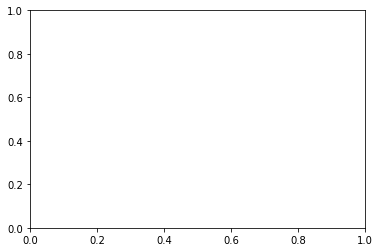

In [3]:
import matplotlib.pyplot as plt

## Plot the Dataframe
fig, ax= plt.subplots()
ax.barh(df['features'][:n],df['feature_importance'][:20]) 
ax.set_xlabel('features')
ax.set_ylabel('feature Importance')

In [39]:
good 


9.333333333333334